In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Charger le fichier CSV
df = pd.read_csv("../data/HR-Employees.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Infos de base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1463 non-null   float64
 1   Attrition                 1478 non-null   object 
 2   BusinessTravel            1478 non-null   object 
 3   DailyRate                 1478 non-null   int64  
 4   Department                1478 non-null   object 
 5   DistanceFromHome          1478 non-null   int64  
 6   Education                 1478 non-null   int64  
 7   EducationField            1478 non-null   object 
 8   EmployeeCount             1478 non-null   int64  
 9   EmployeeNumber            1478 non-null   int64  
 10  EnvironmentSatisfaction   1478 non-null   int64  
 11  Gender                    1478 non-null   object 
 12  HireDate                  1478 non-null   object 
 13  HourlyRate                1478 non-null   int64  
 14  JobInvol

In [5]:
cols = ['EmployeeCount', 'Over18', 'StandardHours']

for col in cols:
    print(f"Unique values of the column '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values of the column 'EmployeeCount':
[1]
----------------------------------------
Unique values of the column 'Over18':
['Y']
----------------------------------------
Unique values of the column 'StandardHours':
[80]
----------------------------------------


In [6]:
# Remove unnecessary columns
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [7]:
missing_report = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

print("Missing values by column :\n", missing_report)
print("\nPercentage of missing values by column :\n", missing_percent)


Missing values by column :
 Age                         15
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HireDate                     0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
LastPromotionDate            0
MaritalStatus                0
MonthlyIncome               29
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurr

<Axes: >

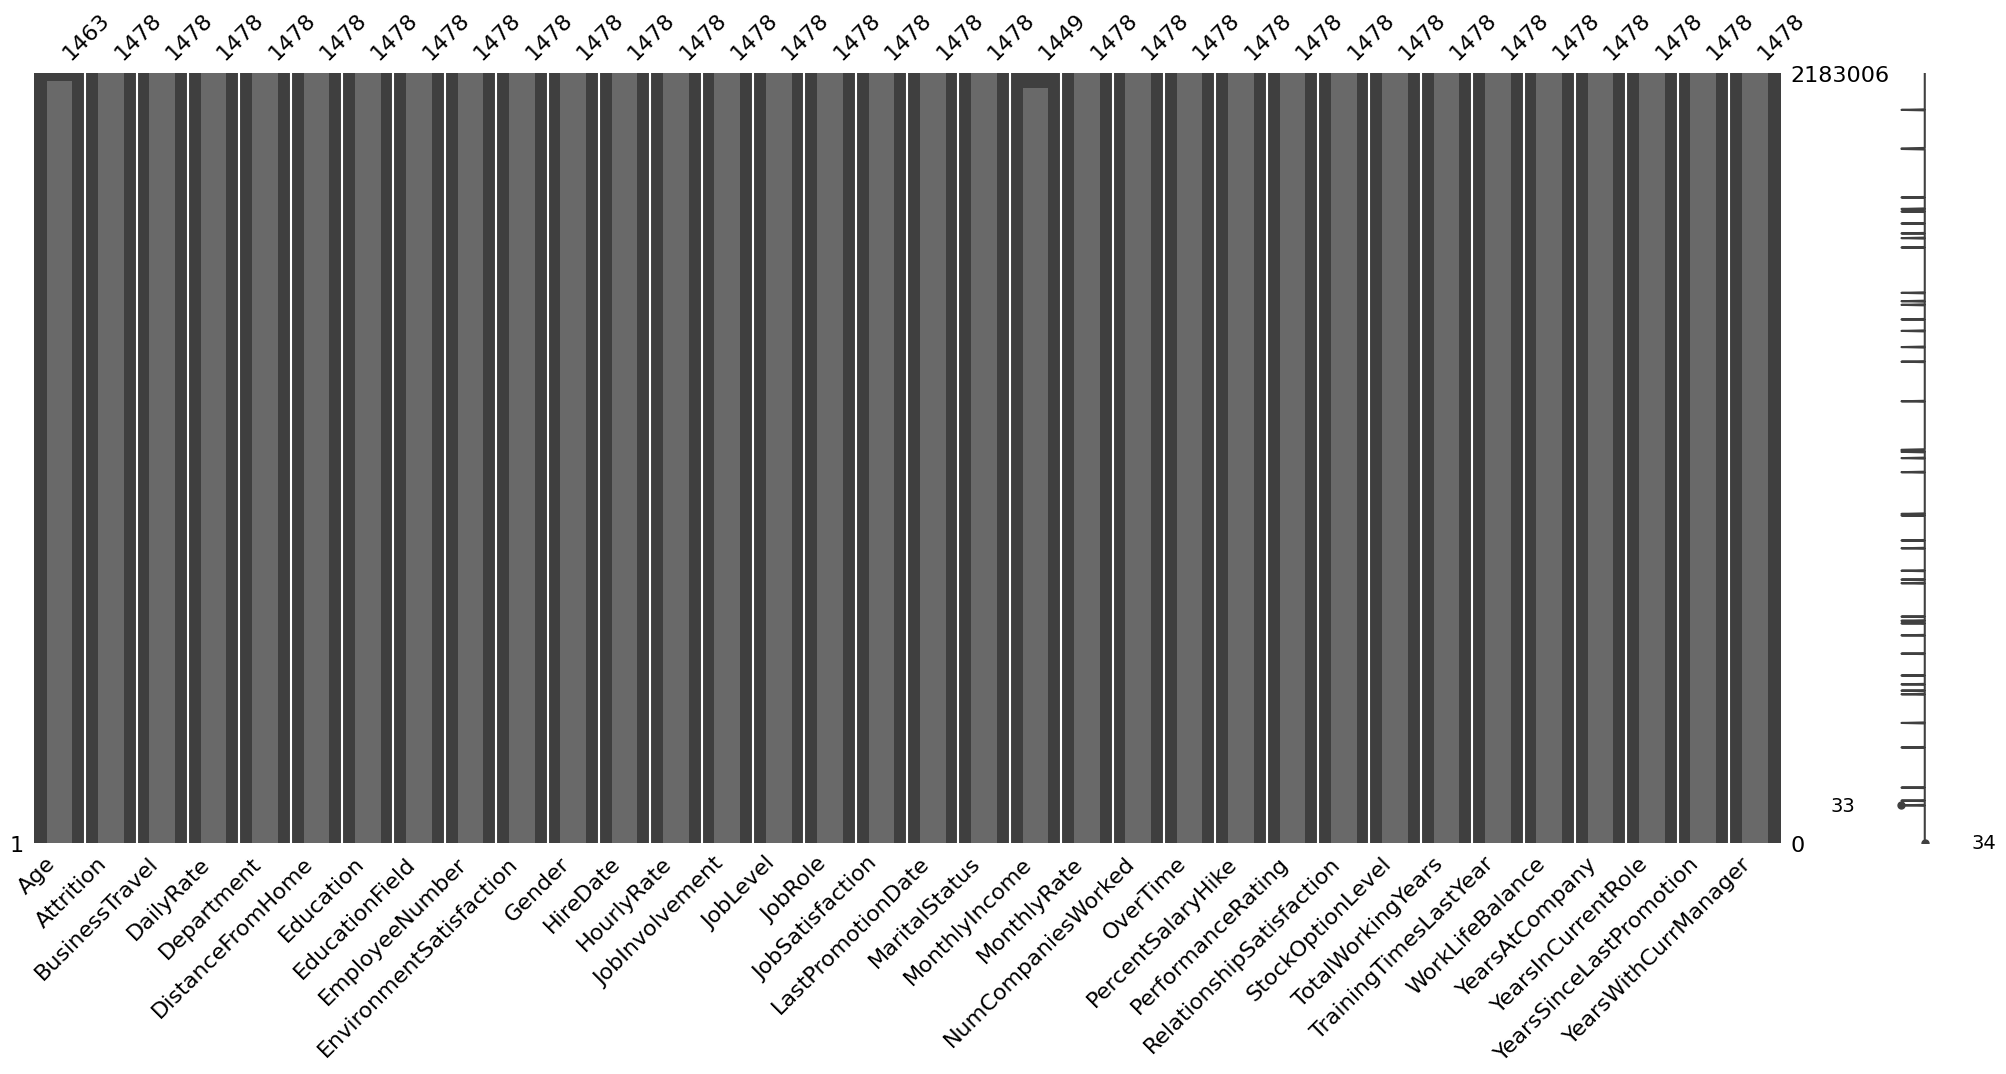

In [8]:
import missingno as msno
# Visualization of missing values
msno.matrix(df)
msno.bar(df)

In [9]:
#Imputation of missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())


In [10]:
#recheck that the missing values have been properly imputed
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HireDate                    0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
LastPromotionDate           0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [11]:
print(df['Age'].dtype)
print(df['MonthlyIncome'].dtype)

float64
float64


In [12]:
df['Age'] = df['Age'].astype(int)
df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

In [13]:
print("Number of duplicates :", df.duplicated().sum())


Number of duplicates : 3


In [14]:
df = df.drop_duplicates()
print("Number of duplicates after removal :", df.duplicated().sum())

Number of duplicates after removal : 0


In [15]:
# Liste des colonnes qu'on sait être des dates
date_cols = ['HireDate', 'LastPromotionDate']

# Conversion sécurisée
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')



In [16]:
# Check the data types of specific columns
print(df[['HireDate', 'LastPromotionDate']].dtypes)

HireDate             datetime64[ns]
LastPromotionDate    datetime64[ns]
dtype: object


In [17]:
# Cleaning of inconsistent values
df = df[df['Age'].between(18, 65)]  
df = df[df['Gender'].isin(['Male', 'Female'])]  

In [18]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating RelationshipSatisfaction  \
0                        2  ...                 3                        1   
1       

In [20]:
# Statistics for numerical variables
print("Statistics of numerical variables :\n", df.describe())

Statistics of numerical variables :
                Age    DailyRate  DistanceFromHome    Education  \
count  1475.000000  1475.000000       1475.000000  1475.000000   
mean     36.939661   802.753898          9.195254     2.913898   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   
std       9.063983   403.490920          8.113249     1.026139   

       EmployeeNumber  EnvironmentSatisfaction                       HireDate  \
count     1475.000000              1475.000000                           1475   
mean      1025.791864                 2.722712  2015-07-08 17:12:53.694915328   
min          1.000000                 1.000000            2010-01-02 00:00:00   
25%        492.500000                 2.0000

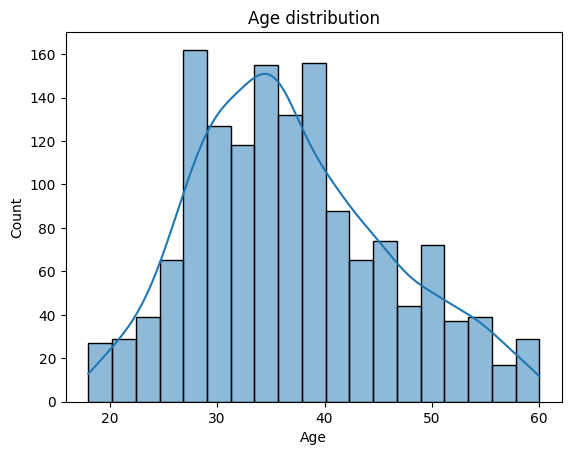

In [ ]:

sns.histplot(df['Age'], kde=True)
plt.title("Age distribution")
plt.show()

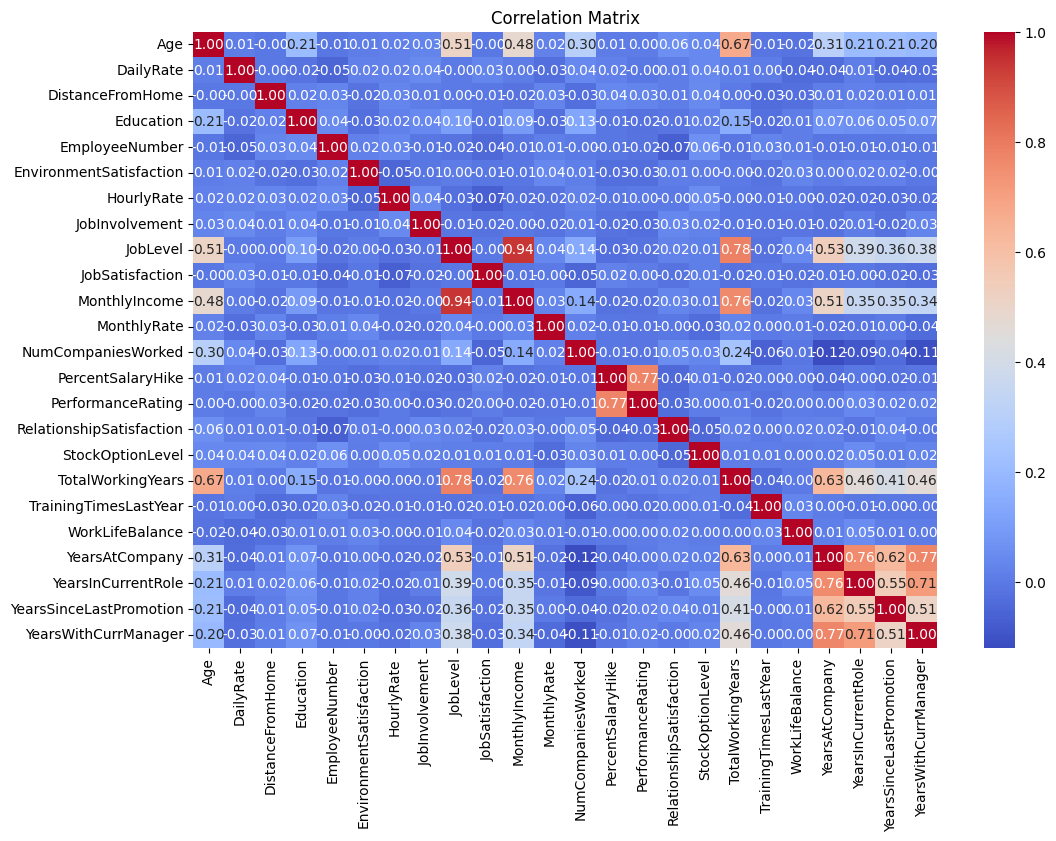

In [22]:
# Visualization of the correlation between numerical variables
numeric_df = df.select_dtypes(include=['number'])  
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [23]:
# Creation of new columns (calculating the years remaining until retirement)
df['YearsToRetire'] = 65 - df['Age']
df['YearsToRetire'] = df['YearsToRetire'].apply(lambda x: x if x > 0 else 0)

In [24]:
# Final summary
print("Cleaned data. Final dimensions. :", df.shape)
print("Type of data :\n", df.dtypes)
print(df.head())

Cleaned data. Final dimensions. : (1475, 35)
Type of data :
 Age                                  int64
Attrition                           object
BusinessTravel                      object
DailyRate                            int64
Department                          object
DistanceFromHome                     int64
Education                            int64
EducationField                      object
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                              object
HireDate                    datetime64[ns]
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobRole                             object
JobSatisfaction                      int64
LastPromotionDate           datetime64[ns]
MaritalStatus                       object
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                  

In [25]:
df.to_csv("HR-Employees-cleaning.csv", index=False)